In [1]:
import heapq
from collections import deque

class WeightedGraph:
    def __init__(self):
        self.graph = {}

    def add_vertex(self, vertex):
        if vertex not in self.graph:
            self.graph[vertex] = []

    def add_edge(self, from_vertex, to_vertex, weight):
        if from_vertex in self.graph and to_vertex in self.graph:
            self.graph[from_vertex].append((to_vertex, weight))
            self.graph[to_vertex].append((from_vertex, weight))  # For an undirected graph

    def get_neighbors(self, vertex):
        if vertex in self.graph:
            return self.graph[vertex]
        else:
            return []

    def __str__(self):
        result = ""
        for vertex, neighbors in self.graph.items():
            result += f"{vertex} -> {neighbors}\n"
        return result

    def dijkstra_shortest_path(self, start_vertex):
        if start_vertex not in self.graph:
            return None

        # Initialize the distance dictionary with infinity for all vertices except the start vertex.
        distances = {vertex: float('inf') for vertex in self.graph}
        distances[start_vertex] = 0

        # Priority queue to store vertices to explore.
        priority_queue = [(0, start_vertex)]

        # Dictionary to keep track of the previous vertex in the shortest path.
        previous = {}

        while priority_queue:
            current_distance, current_vertex = heapq.heappop(priority_queue)

            # Skip if we have already processed this vertex.
            if current_distance > distances[current_vertex]:
                continue

            for neighbor, weight in self.graph[current_vertex]:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    previous[neighbor] = current_vertex
                    heapq.heappush(priority_queue, (distance, neighbor))

        return distances, previous

    def shortest_path(self, start_vertex, end_vertex, alg='dijkstra'):
        if alg == 'dijkstra':
            distances, previous = self.dijkstra_shortest_path(start_vertex)
        else:
            distances, previous = self.bellman_ford_shortest_path(start_vertex)
        
        if end_vertex not in distances:
            return []

        path = []
        while end_vertex:
            path.insert(0, end_vertex)
            end_vertex = previous.get(end_vertex)

        return path

    def bfs_shortest_path(self, start_vertex, end_vertex):
        if start_vertex not in self.graph or end_vertex not in self.graph:
            return []

        visited = set()
        queue = deque()
        queue.append((start_vertex, [start_vertex]))  # (current_vertex, path_so_far)

        while queue:
            current_vertex, path = queue.popleft()
            visited.add(current_vertex)

            if current_vertex == end_vertex:
                return path

            for neighbor, _ in self.graph[current_vertex]:
                if neighbor not in visited:
                    new_path = path + [neighbor]
                    queue.append((neighbor, new_path))

        return []
    
    def dfs_path(self, start_vertex, end_vertex, visited=None):
        if visited is None:
            visited = set()

        if start_vertex not in self.graph or end_vertex not in self.graph:
            return []

        visited.add(start_vertex)

        if start_vertex == end_vertex:
            return [start_vertex]

        for neighbor, _ in self.graph[start_vertex]:
            if neighbor not in visited:
                path = self.dfs_path(neighbor, end_vertex, visited)
                if path:
                    return [start_vertex] + path

        return []
    
    def bellman_ford_shortest_path(self, start_vertex):
        if start_vertex not in self.graph:
            return None

        # Initialize distances and predecessors
        distances = {vertex: float('inf') for vertex in self.graph}
        predecessors = {vertex: None for vertex in self.graph}
        distances[start_vertex] = 0

        # Relaxation step for each edge
        for _ in range(len(self.graph) - 1):
            for from_vertex in self.graph:
                for to_vertex, weight in self.graph[from_vertex]:
                    if distances[from_vertex] + weight < distances[to_vertex]:
                        distances[to_vertex] = distances[from_vertex] + weight
                        predecessors[to_vertex] = from_vertex

        # Check for negative cycles
        for from_vertex in self.graph:
            for to_vertex, weight in self.graph[from_vertex]:
                if distances[from_vertex] + weight < distances[to_vertex]:
                    raise ValueError("Graph contains a negative cycle")

        return distances, predecessors


In [2]:
import random

g = WeightedGraph()
g.add_vertex("A")
g.add_vertex("B")
g.add_vertex("C")
g.add_vertex("D")
g.add_vertex("E")
g.add_vertex("F")
g.add_vertex("G")
g.add_vertex("H")
g.add_vertex("I")
g.add_vertex("J")

# Add edges and weights
edges = [("A", "B", 5), ("A", "C", 3), ("B", "D", 7), ("C", "E", 2),
         ("D", "E", 4), ("E", "F", 6), ("E", "H", 8), ("F", "G", 1), 
         ("G", "H", 9), ("G", "J", 10), ("H", "I", 8), ("I", "J", 10)]

for edge in edges:
    from_vertex, to_vertex, weight = edge
    g.add_edge(from_vertex, to_vertex, weight)
    
print(str(g))

A -> [('B', 5), ('C', 3)]
B -> [('A', 5), ('D', 7)]
C -> [('A', 3), ('E', 2)]
D -> [('B', 7), ('E', 4)]
E -> [('C', 2), ('D', 4), ('F', 6), ('H', 8)]
F -> [('E', 6), ('G', 1)]
G -> [('F', 1), ('H', 9), ('J', 10)]
H -> [('E', 8), ('G', 9), ('I', 8)]
I -> [('H', 8), ('J', 10)]
J -> [('G', 10), ('I', 10)]



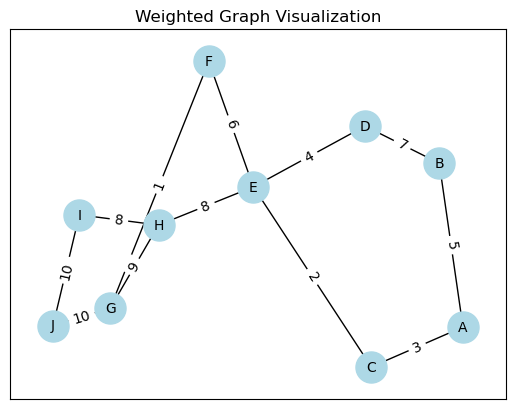

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# Create a NetworkX graph
G = nx.Graph()

# Add nodes and edges from the WeightedGraph to the NetworkX graph
for vertex, neighbors in g.graph.items():
    G.add_node(vertex)
    for neighbor, weight in neighbors:
        G.add_edge(vertex, neighbor, weight=weight)

# Define the layout for the graph (you can change this to suit your needs)
layout = nx.spring_layout(G)

# Extract edge weights to label edges
edge_labels = {(u, v): w["weight"] for u, v, w in G.edges(data=True)}

# Draw the graph with labels
nx.draw_networkx(G, layout, with_labels=True, node_size=500, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_labels)
plt.title("Weighted Graph Visualization")
plt.show()

In [4]:
# Find a path between two nodes using DFS
start_node = "B"
end_node = "J"
path = g.dfs_path(start_node, end_node)
if path:
    print(f"Path from {start_node} to {end_node}: {path}")
else:
    print(f"No path found from {start_node} to {end_node}.")

Path from B to J: ['B', 'A', 'C', 'E', 'F', 'G', 'H', 'I', 'J']


In [5]:
# Find the shortest path between two nodes using BFS
start_node = "B"
end_node = "J"
shortest_path = g.bfs_shortest_path(start_node, end_node)
if shortest_path:
    print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")
else:
    print(f"No path found from {start_node} to {end_node}.")


Shortest path from B to J: ['B', 'D', 'E', 'F', 'G', 'J']


In [6]:
# Find the shortest path between two nodes
start_node = "B"
end_node = "J"
shortest_path = g.shortest_path(start_node, end_node)
if shortest_path:
    print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")
else:
    print(f"No path found from {start_node} to {end_node}.")

Shortest path from B to J: ['B', 'A', 'C', 'E', 'F', 'G', 'J']


In [7]:
# Find the shortest path between two nodes
start_node = "B"
end_node = "J"
shortest_path = g.shortest_path(start_node, end_node, 'bf')
if shortest_path:
    print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")
else:
    print(f"No path found from {start_node} to {end_node}.")

Shortest path from B to J: ['B', 'A', 'C', 'E', 'F', 'G', 'J']
